# Python 2 tutorial (modules)

Python is a programming language that is flexible and extendible. As a consequence, many libraries are now available. These libraries are provided as "packages" which contain modules that can be reused using an "import module_name" statement. Also, if you have not noted it yet, we are using a special "version" of Python, called IPython. Without it, you would not be able to use this nice browser interface provided by Jupyter (a migration of the "Ipython notebooks" project) to run code interactively. 

## Example data fitting and plotting with Numpy and Matplotlib

Text(0,0.5,u'Y0')

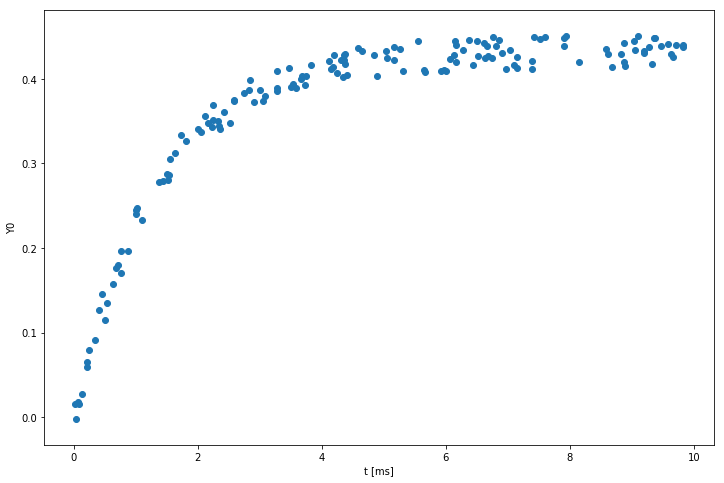

In [2]:
# Import Numpy (numeric library) and Matplotlib (plotting library).
# See http://wiki.scipy.org/NumPy_for_Matlab_Users
import numpy as np
import matplotlib.pyplot as plt

# IPython magic command: plots will be generated inline instead of in a separated window.
# See http://ipython.org/ipython-doc/dev/interactive/magics.html
%matplotlib inline

# Load data
ds = np.loadtxt('data1.txt', skiprows=1) # Numpy can read data from .txt files
xdata = ds[:,0]                          # Read the first column of the file
ydata = ds[:,1]

# Plot data
fig0, ax = plt.subplots(figsize=(12,8))
ax.scatter(xdata, ydata)
ax.set_xlabel('t [ms]')
ax.set_ylabel('Y0')

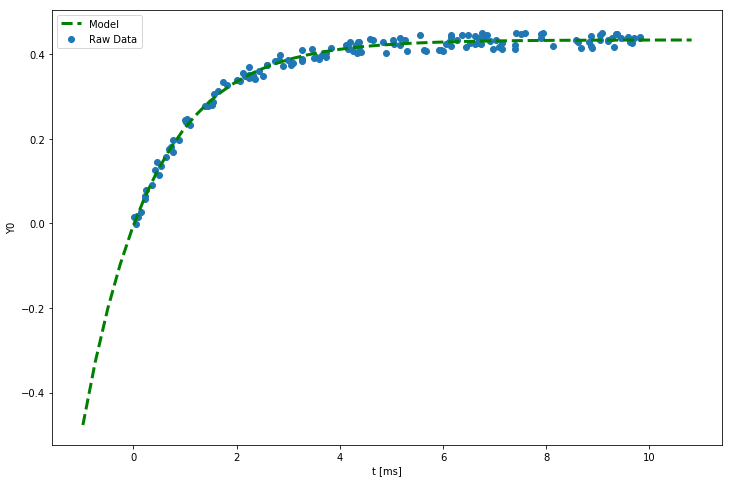

In [3]:
# We will use the function "curve_fit", that can be found in the module "optimize" of the library "SciPy"

from scipy.optimize import curve_fit

def expcurve(x, a):
    '''A model'''
    return 1 - a*np.exp(-x)

def betterexpcurve(x, a, b, c):
    '''A better model'''
    return a - b*np.exp(-x*c)


# Fit model
popt, pcov = curve_fit(betterexpcurve, xdata, ydata)

# Standard deviation errors on the parameters, see curve_fit documentation
perr = np.sqrt(np.diag(pcov))

# Generate data from the model
x = np.linspace(min(xdata)-1, max(xdata)+1)
y = betterexpcurve(x, *popt)

# Plot raw data and model
fig1, ax = plt.subplots(figsize=(12,8))
ax.scatter(xdata, ydata, label='Raw Data')
ax.plot(x,y, '--g', lw=3, label='Model')
ax.set_xlabel('t [ms]')
ax.set_ylabel('Y0')
ax.legend(loc=2)

### Scipy

In [4]:
from scipy import linalg
A = np.matrix('[1 2;3 4]')
b = np.matrix([5,6])

A*b.T
linalg.inv(A)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

#### Let's solve a system:

\begin{eqnarray*} x + 3y + 5z & = & 10 \\
                   2x + 5y + z & = & 8  \\
                   2x + 3y + 8z & = & 3
\end{eqnarray*}
 
we can write it in this format:

\begin{split}\left[\begin{array}{ccc} 1 & 3 & 5\\ 2 & 5 & 1\\ 2 & 3 & 8\end{array}\right]\left[\begin{array}{c} x\\ y\\ z\end{array}\right]=\left[\begin{array}{c} 10\\ 8\\ 3\end{array}\right].\end{split}

In [5]:
A = np.array([[1,3,5], [2,5,1], [2,3,8]])
b = np.array([10, 8, 3])

x = linalg.solve(A,b)

In [31]:
# determinant and norma
print A
print linalg.det(A)
print linalg.norm(A, 1)

[[1 3 5]
 [2 5 1]
 [2 3 8]]
-25.0
14.0


### Pandas

In [14]:
import pandas as pd 

df = pd.read_csv('data1.txt', sep = '\t') 


In [17]:
df.head()

,%t[ms],X
0,8.582858,0.434921
1,2.364236,0.340858
2,1.009101,0.239693
3,7.151715,0.413323
4,7.395740,0.411733


In [20]:
df.columns = ['t','X']

In [30]:
df['t']
df.X[1:3]

df['X'].mean()
df['X'].max()


0.45137969725799998